<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Analiticas_Kanban_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: reforzar conocimientos de estadísticas aplicadas al análisis de datos, aplicando herramientas de programación y computación en la nube (Python y Google Colab)

autor: Roberto Moraga Diaz - Lean Agile Coach

puedes encontrar más info de notebooks aquí: https://github.com/robertomoragad/Estadistica

#**Analíticas kanban con Pandas**

Desde el año 2018 que he realizado diferentes talleres de Lean para enseñar sus principios, el mindset y junto con ello algunas herramientas para practicar y aprender haciendo.  Una simulación que me gusta mucho es desarrollar un flujo de valor (con 6 etapas) y luego comenzar a realizar distintos escenarios de acuerdo al 'cap wip' del sistema de trabajo. Con este simulación las personas pueden experimentar primero un sistema Push, y luego un sistema Pull con diferentes límites WIP a nivel sistema. Aquí los escenarios:



1.   Sistema Push
2.   Sistema Pull con cap wip = 15
3.   Sistema Pull con cap wip = 3
4.   Sistema Pull con cap wip = 6

<img src='https://drive.google.com/uc?export=view&id=1qUCXegv_3AoOJ3gmsJxAzwAOebXiFhIz' width="800" align="left" style="margin-right: 20px"> 
<br>
 
<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>



En cada escenario las personas deben registrar para cada producto algunas métricas como:


*   leadtime
*   cantidad de defectos

Y luego en terminados agregados las siguientes para el escenario trabajado:
*   cantidad de productos terminados
*   utilización 
*   cantidad de productos semi-terminados 

<img src='https://drive.google.com/uc?export=view&id=1_4p_GxGHBG8HoXNsH-RuTtX-Kxecbrnp' width="600" align="left" style="margin-right: 20px"> 
<br>
 
<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>




Luego con los datos obtenidos con los equipos se procede a realizar una visualización, análisis y conclusiones compartidas.  En esta sección comprobamos la ley de little, vemos la relación entre el WIP del sistema V/S el leadtime, throughtput, la utilización y la tasa de defectos.
También hacemos histogramas con los leadtime utnitarios para observar como se reduce la varianza al minimizar el cap WIP, entre varias otras...

<img src='https://drive.google.com/uc?export=view&id=1SEnN6nnTwT9_8MVxOSvPR-ut-QRlJsFx' width="600" align="left" style="margin-right: 20px"> 
<br>
 
<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>


Con los registros de varias simulaciones que he realizado (5 equipos distintos, cada uno de ellos con 4 escenarios anteriormente mencionados) voy a compartir como desarrollar esos mismos análisis ahora con Pandas en python.

Arranquemos. Primero cargar las librerias necesarias y leer la base de datos donde tengo los registros a nivel de cada producto construido por los equipos:

In [7]:
#Importamos librerias de la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib
import pandas as pd #pandas


In [8]:
#lectura de la 'base de datos' de los equipos agile
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRSPG8gag3XFi7Cd4z6lBZYgXY1K5_wFFHTlo8fO4WKnOrUE5WfcISpTzhzoTqYCtmC5unjXZ7XlmmB/pub?gid=0&single=true&output=csv')

In [9]:
#limpiar registros sin leadtime
#visualizar base de datos
base = df.dropna(subset=['Lead time'])

#reemplazar registros con NAN por cero (0)
base = base.fillna(0)

base.tail()

,Equipo,Fecha,Ciclo/experimento,WIP,Producto terminado,t inicio,t fin,LT min,Minuto del ciclo,Lead time,Q semiterminado,q Defecto,utilizacion
570,Team B Summit,6-11-2018,4,6,13,0:02:47,0:03:56,0:01:09,3.0,69.0,0.0,0.0,0.0
571,Team B Summit,6-11-2018,4,6,14,0:03:02,0:04:09,0:01:07,4.0,67.0,0.0,0.0,0.0
572,Team B Summit,6-11-2018,4,6,15,0:03:16,0:04:21,0:01:05,4.0,65.0,0.0,0.0,0.0
573,Team B Summit,6-11-2018,4,6,16,0:03:30,0:04:40,0:01:10,4.0,70.0,0.0,0.0,0.0
574,Team B Summit,6-11-2018,4,6,17,0:03:48,0:04:48,0:01:00,4.0,60.0,0.0,0.0,0.0


In [10]:
#Creamos una vista general, para conocer por cada equipo los resultados de: 
#cantidad de productos completados (cantidad), leadtime (media), tasa de defectos (media) y utilizacion (max)
#esto por el nivel de WIP exhibido en cada escenario de trabajo (3, 6, 15 y  push (20)

table1 = pd.pivot_table(data=base,index=['Equipo', 'WIP'],values=['Producto terminado','Lead time','utilizacion', 'q Defecto'], aggfunc={'Producto terminado':np.size, 'Lead time':np.mean, 'utilizacion':np.max,'q Defecto':np.mean}, margins=False)
table1

Lead time  Producto terminado  q Defecto  utilizacion
Equipo         WIP                                                        
Team A Mariela 3     78.125000                   8   0.125000         0.65
               6     95.428571                  14   0.000000         0.70
               15   142.071429                  14   0.500000         0.95
               20   145.083333                  12   1.583333         1.00
Team A Summit  3     60.333333                  12   0.000000         0.63
               6     64.142857                  21   0.047619         0.75
               15   112.846154                  13   0.230769         0.95
               20   125.666667                  12   0.333333         1.00
Team A masisa  3     58.142857                  14   0.000000         0.60
               6     67.217391                  23   0.086957         0.75
               15   121.083333                  12   0.250000         0.93
               20   147.000000                   5   1.200000         1.00
Team B Loreto  3     56.071429                  14   0.000000         0.65
               6     64.800000                  20   0.000000         0.75
               15   113.235294                  17   0.000000         0.90
               20   189.636364                  11   0.181818         1.00
Team B Summit  3     58.500000                  14   0.000000         0.65
               6     68.176471                  17   0.000000         0.77
               15   113.875000                   8   0.750000         0.97
               20   150.500000                   6   0.833333         0.99
Team B masisa  3     83.727273                  11   0.090909         0.70
               6     85.312500                  16   0.125000         0.80
               15   117.533333                  15   0.333333         0.90
               20   151.750000                   8   0.750000         0.95
Team C Abi     3     88.500000                   8   0.000000         0.70
               6     88.437500                  16   0.062500         0.80
               15   157.000000                   6   0.333333         0.97
               20   193.166667                   6   0.166667         1.00

De la tabla anterior se puede observar algunas relaciones, por ejemplo:


*   Relación lineal: A menor WIP , menor leadtime
*   Relación parabólica entre WIP y el Throughtput (*aquí vemos un valor cercano a WIP =6 , donde se maximiza el TP*).

Veámoslo ahora con un gráfico:




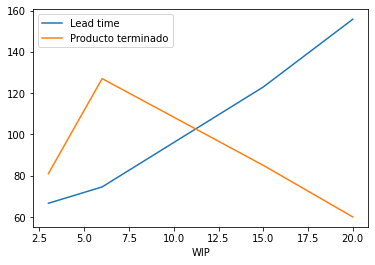

In [11]:
table2 = pd.pivot_table(data=base,index=['WIP'],values=['Producto terminado','Lead time'], aggfunc={'Producto terminado':np.size, 'Lead time':np.mean}, margins=False)
table2

table2.plot(kind='line');

Otras relaciones:

*  Relación lineal: A menor WIP , menor utilización
*  Relación exponencial: A mayor WIP, mayo tasa de defecto

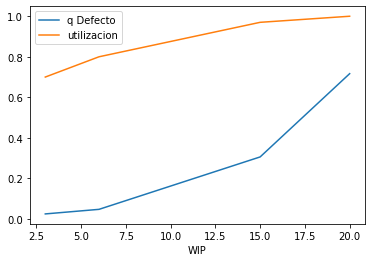

In [31]:
table3 = pd.pivot_table(data=base,index=['WIP'],values=['q Defecto','utilizacion'], aggfunc={'q Defecto':np.average, 'utilizacion':np.max}, margins=False)
table3

table3.plot(kind='line')

Con las vistas anteriores nos dimos cuenta que el leadtime disminuye al reducir el WIP, pero esa es una relación a nivel agregada, que a veces puede ocultar información y llevarnos a tomar decisiones incorrectas.  Calculemos la media y desviación estandar del tiempo de entrega por cada Nivel de WIP, y luego realicemos un histograma para cada uno de ellos.

,average,std
,Lead time,Lead time
WIP,,
3,66.617284,18.107021
6,74.519685,17.725800
15,122.941176,45.977570
20,155.766667,60.424309


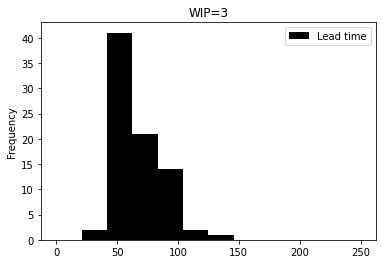

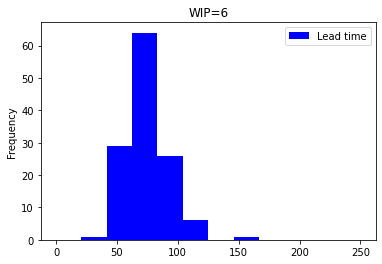

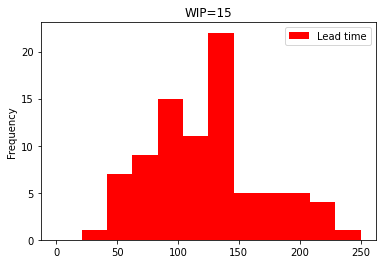

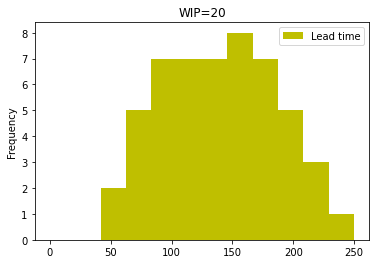

In [40]:
#Filtrando los distintos niveles de WIP
wip3=base.query('WIP == 3')
wip6=base.query('WIP == 6')
wip15=base.query('WIP == 15')
wip20=base.query('WIP == 20')

#Graficar los histogramas
wip3.plot( y='Lead time', kind='hist', bins=12, range=(0, 250), title='WIP=3', color="k" )
wip6.plot( y='Lead time', kind='hist', bins=12, range=(0, 250), title='WIP=6', color="b" )
wip15.plot( y='Lead time', kind='hist', bins=12, range=(0, 250), title='WIP=15', color="r" )
wip20.plot( y='Lead time', kind='hist', bins=12, range=(0, 250), title='WIP=20', color="y" )

#calcular medias y desv. std
table3 =  pd.pivot_table(base, index = ['WIP'], values = ['Lead time'] , aggfunc = [np.average, np.std]) 
table3

Veamos la relación entre el tiempo de entrega y la tasa de defecto, será que al reducir el tiempo este impacta generando productos con más defectos?


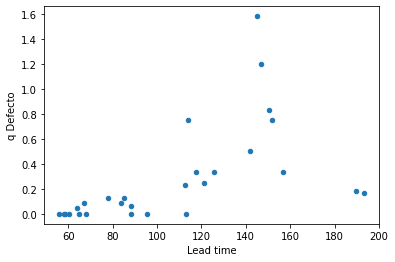

In [61]:
#Diagrama de dispersion
table1.plot(x='Lead time', y='q Defecto',kind='scatter')

La gráfica anterior arroja que la menor tasa de defecto se observa cuando el leadtime es menor a 64 unidades de tiempo.


Finalmente existe una relación entre la utilización de un sistema y la capacidad de producción? veamos en el siguiente gráfico su respuesta..

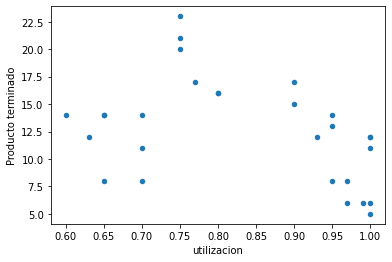

In [62]:
#Diagrama de dispersion 
table1.plot(x='utilizacion', y='Producto terminado',kind='scatter')

El gráfico anterior nos arroja que tener un sistema con alta utilización no significa alta productividad, en este caso el óptimo se observa cuando la utilización es cercana al 75%.



---


De lo anterior podemos concluir con estos datos que al reducir el WIP el leadtime disminuye, junto con su variabilidad, por otro lado el Throuhtput aumenta cuando se reduce el WIP, exhibiendo un máximo cuando el WIP=6, luego al seguir reduciendo el WIP el Throuhtput comienza a disminuir, esto explicado porque la utilización del sistema tiene capacidad sub-utilizada (un 30% aprox). 

En este caso la decisión sobre el nivel de WIP a utilizar debe impactar positivamente un KPI de negocio, por ejemplo tal vez sea adecuado trabajar con WIP=3 ya que con este escenario se obtienen los mejores tiempos de entrega, junto con una tasa de defecto muy baja, lo cual se traduce en mayor satisfacción de clientes. Por otro lado en este escenario los equipos tienen un 30% de espacio para sortear variabilidades de la demanda, innovación o mejora continua, y sin el stress de un sistema Push...

Si la ecuación de valor a maximizar el Cantidad de productos terminados (=Throughtput), se debería utilizar el cap WIP = 6. 



Qué pasaría si el target de tiempo de entrega fuera 70 unidades de tiempo, cuál escenario es mejor, y si fuera 85 segundos?



```
escriba su código aquí...
```



Recordar que estos son solo 4 escenarios simulados, pueden haber otros y con configuraciones distintas en cada uno, donde se desarrollen formatos donde exista mayor colaboración o multi-funcionalidad.


Espero que este documento sirva de ejemplo para comprender un sistema de flujo, junto con el análisis de sus datos de cara a la toma de mejores decisiones.

---



#ANEXO

con los siguientes análisis se puede observar lo que ocurre con los tiempos de entrega en la medida que avanza el tiempo de la simulación, por ejemplo cuando el WIP es 15 o 20, vemos que al pasar el tiempo de la simulación los leadtime tienden a aumentar, incluso en el tiempo de simulación no se alcanza estabilidad. proyectando leadtime aun mayores.

Cuando el WIP es 3 o 6, a la mitad de la simulación el sistema alcanza estabilidad, proyectando incluso leadtime inferiores en caso de seguir operando en esa modalidad.

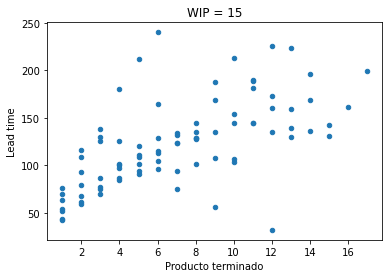

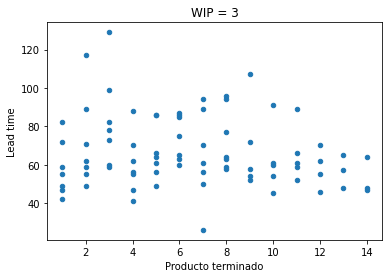

In [69]:


#Filtrando los distintos niveles de WIP
wip3=base.query('WIP == 3')
wip6=base.query('WIP == 6')
wip15=base.query('WIP == 15')
wip20=base.query('WIP == 20')

#Grafica de control wip 15
wip15.plot(x='Producto terminado', y='Lead time', kind='scatter', title='WIP = 15' )

#Grafica de control wip 3
wip3.plot(x='Producto terminado', y='Lead time', kind='scatter', title='WIP = 3')